In [2]:
import numpy as np 
import pandas as pd 
df = pd.read_csv('./titanic.csv')

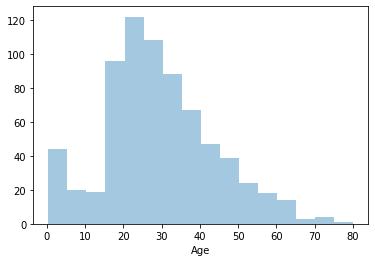

In [3]:
import seaborn as sns

sns.distplot(df['Age'].dropna(), hist=True, kde=False, bins=16)

In [4]:
122/714/5

0.03417366946778712

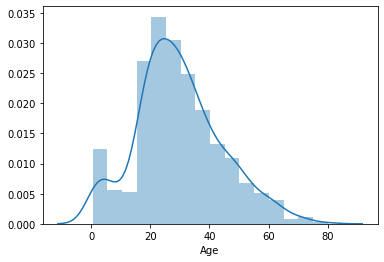

In [5]:
sns.distplot(df['Age'].dropna(), hist=True, kde=True, bins=16)

In [12]:
ls_age = df['Age'].dropna().values

def threshold(upper, lower, ls):
    c = 0
    for i in ls:
        if i >= lower and i <= upper:
            c += 1
        else:
            pass
    return c
threshold(25,20, ls_age)

137

In [15]:
########## REVIEW THIS LATER
def calculate_cdf(x, threshold):
    return np.sum(x <= threshold)

# Create an array cdf_age where each value is the cdf of the age for each threshold

cdf_age = []
#Find the minimum value in the array
min_val = np.min(ls_age)
# Set the threshold to be the minimum value of the array
threshold = np.min(ls_age)
# For a given array of numbers and a given threshold, 
for r in range(int(np.min(ls_age)), int(np.max(ls_age))):
    # count all of the elements in the array that are less than the threshold,
    less_than_threshold = calculate_cdf(ls_age, r)
    #  and divide that count by the length of the array
    age_value = less_than_threshold/len(ls_age)
    
    cdf_age.append(age_value)
    # Repeat, increasing the threshold by one,
    # until the threshold is equal to the maximum value in the array

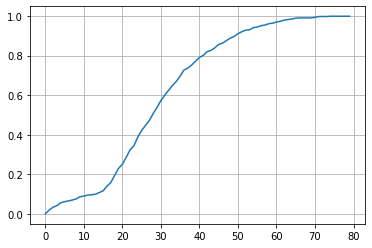

In [16]:
import matplotlib.pyplot as plt

plt.plot(range(int(np.min(ls_age)), int(np.max(ls_age))), cdf_age)
plt.grid()

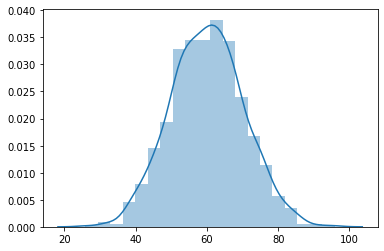

In [7]:
# Generate 1000 samples with 60 as its mean and 10 as its std
a = np.random.normal(60, 10, 1000)
sns.distplot(a, hist=True, kde=True, bins=20)

In [18]:
def area(lw, hi, ls):
    count = 0
    for i in ls:
        if i > lw and i < hi:
            count += 1
    return (count/len(ls)) * 100

area(60, 70, a)

68.7

In [31]:
ls_grade = np.random.normal(60, 10, 1000)

def area2(hi, ls):
    count = 0
    for i in ls:
        if i > hi:
            count += 1
    return (count/len(ls)) *100

area2(70, a)

# or 


15.7

In [32]:
from scipy.stats import norm

print(norm.sf(70, loc=60, scale=10))

# or

1 - norm.cdf(70, loc=60, scale=10)

#cdf is always >= survival is always > or 1 - cdf

0.15865525393145707


0.15865525393145707

the area under any pdf is = one(1).

In [42]:
a_scale = []
def p(ls):
    for i in ls:
        x = (60 - i)/10
        a_scale.append(x)
    return np.mean(a_scale)
p(a)
    

-0.009205356080140994

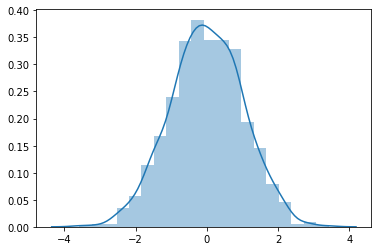

In [45]:
sns.distplot(a_scale, hist=True, kde=True, bins=20)


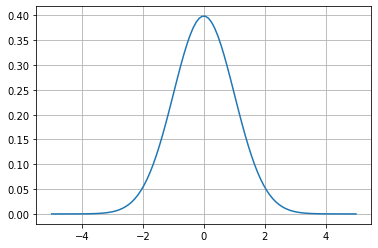

In [58]:
import matplotlib.pyplot as plt
def gaussian_f(x, mu, sigma):
    f = 1/np.sqrt(2*np.pi*sigma**2)*np.exp(-(x - mu)**2/2/(sigma**2))
    return f

x = np.linspace(-5, 5, 100)
y = [gaussian_f(i, 0, 1) for i in x]

plt.plot(x, y)
plt.grid()